# CASSIOPE-Disponibilité-Données
***

**Tutoriel :** Ce tutoriel permet de regarder la disponibilité des données par instrument pour une certaine période de temps.   
**Mission and Instrument :** CASSIOPE    
**Astronomical Target :** Étudier l'ionosphère    
**Primary Tools :** Script Python3     
**Tutorial Level :** Facile    

Sur les plateformes d'extraction de données de l'Université de Calgary, on ne peut pas voir facilement à quel moment les instruments sont activés ou désactivés. Dans ce tutoriel, une simple ligne du temps avec chaque instrument sera créée pour aider les utilisateurs à vérifier si les données sont disponibles à certain moment. Pour faire cela, on a besoin d'une série de fichiers *CAS_ePOP_Data_XXX_XXX_XXX_1.0.0.txt* pour les dates voulues. Ces fichiers ne sont pas disponibles présentement via le eDex, mais ils sont disponibles sur l'accès HTTP. Si vous voulez une grande quantité de ces fichiers, vous pouvez envoyer un courriel à l'Université de Calgary à [esoc@phys.ucalgary.ca](mailto::esoc@phys.ucalgary.ca) avec votre demande.

## Bibliothèque

Le script suivant utilise

* *ipyml* : pour des figures interactives (optionnal)
* *pandas* : structure de dataframe
* *matplotlib* : tracer des figures
* *os* : faire de la recherche dans le système de l'utilisateur

## Disponibilité des données

Une seule fonction est nécessaire pour visualiser la disponibilité des données par instrument. On a besoin d'une liste de fichiers, d'un répertoire, d'une date de début, d'une date de fin et d'un booléen indiquant si une recherche dans la liste de fichiers est nécessaire.

In [1]:
# Si tu n'as pas ipympl, tu peux supprimer cette ligne
%matplotlib ipympl 

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

# Céer le graphique avec la disponibilité des données par instrument
# filelist : liste de noms de fichier
# directory : répertoire où les fichiers sont
# startDate, endDate : string représentant une date YYYYMMDD (optionel)
# search : booléen utilisé pour spécifier si on veut utiliser tous les fichiers dans la liste de fichiers ou 
#          chercher les fichiers correspondants aux dates entrées (False par défaut)
def availabilityPlot(filelist,directory,startDate,endDate,search=False):
    
    # Chercher les fichiers entre la date de début et de fin
    if search:
        for f in filelist:
            if startDate in f:
                firstFile = filelist.index(f)
                break

        for f in filelist[firstFile:]:
            if endDate in f:
                lastFile = filelist.index(f)
                break
        filelist=filelist[firstFile:lastFile+1] # Les fichiers pour la période désirée
    
    # Append et concatenate tous les fichiers .txt ensemble
    df_list = []
    for f in filelist:
        try:
            temp = pd.read_csv(directory+f,header=None,usecols=[0,1],skiprows=2,parse_dates=[1],infer_datetime_format=True)
            temp.columns=['Instrument','Date']
        except:
            pass
          
        df_list.append(temp)
    
    df = pd.concat(df_list,ignore_index=True)
    
    # Changer la structure du data frame
    df.columns = ['Instrument','Date']
    df['Date']=pd.to_datetime(df['Date']).dt.normalize()
    df.drop_duplicates(inplace=True, ignore_index=True)
    
    # Créer des sous-ensembles de data frame pour le graphe
    cer = df[df['Instrument']=='CER']
    fai = df[df['Instrument']=='FAI']
    gap = df[df['Instrument']=='GAP']
    irm = df[df['Instrument']=='IRM']
    mgf = df[df['Instrument']=='MGF']
    nms = df[df['Instrument']=='NMS']
    rri = df[df['Instrument']=='RRI']
    sei = df[df['Instrument']=='SEI']
    
    # Créer la figure
    fig, ax = plt.subplots(figsize=[8,4])
    plt.subplots_adjust(bottom=0.25,top=0.92)
    colors=['blue','orange','green','lightblue','red','pink','purple','turquoise']
    ax.grid(which='major',axis='x',alpha=0.7,lw=0.7,ls='-')
    ax.grid(which='minor',axis='x',alpha=0.7,lw=0.5,ls='--')
    for i,d in enumerate([cer,fai,gap,irm,mgf,nms,rri,sei]):
        ax.scatter(d['Date'],d['Instrument'],color=colors[i],marker='|',linewidths=0.75)
    
    fig.suptitle('Disponibilité des données par instrument',fontsize=14)
    
    # Graduations sur l'axe des x personnalisées
    start = pd.to_datetime(startDate)
    end = pd.to_datetime(endDate)
    interval = int((end-start)/np.timedelta64(1, 'M'))
    
    if(interval<=6):
        ax.set_xticks(pd.date_range(start,end,freq='W'),minor=False)
    elif(interval<=18):
        ax.set_xticks(pd.date_range(start,end,freq='MS'),minor=False)
        ax.set_xticks(pd.date_range(start,end,freq='SMS'),minor=True)
    elif(interval<=36):
        ax.set_xticks(pd.date_range(start,end,freq='MS'),minor=True)
        ax.set_xticks(pd.date_range(start,end,freq='2MS'),minor=False)
    elif(interval<=60):
        ax.set_xticks(pd.date_range(start,end,freq='4MS'),minor=False)
        ax.set_xticks(pd.date_range(start,end,freq='2MS'),minor=True)
    else:
        xmajor=pd.date_range(str(start.year)+'0701',str(end.year)+'0701',freq='6MS')
        ax.set_xticks(pd.date_range(start,end,freq='QS'),minor=True)
        ax.set_xticks(xmajor,minor=False)
    
    ax.tick_params(which='major',axis='x',labelrotation=90,labelsize=8)
    
    return

Commençons par regarder la disponibilité des données en 2021. Le paramètre "search=True" indique que la liste de fichiers inclut plus de dates que 2021. Il est possible d'agrandir la figure pour regarder un mois spécifique par exemple.

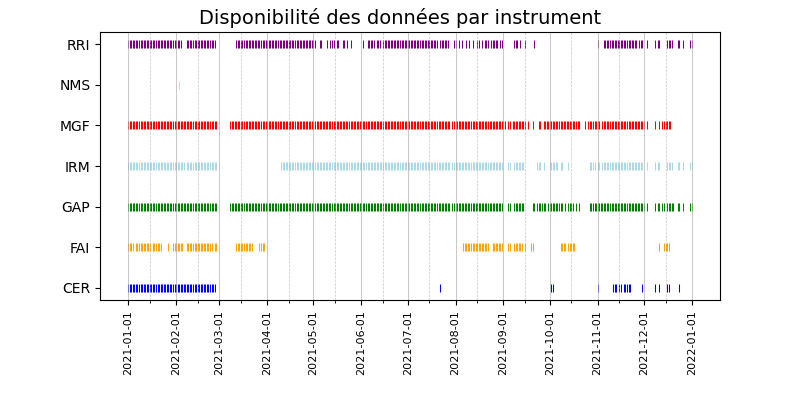

In [3]:
startDate='20210101'
endDate='20220101'
directory = 'cas_epop_data_files\\'
filelist = os.listdir(directory)

availabilityPlot(filelist,directory,startDate,endDate,search=True)

On peut aussi regarder la disponibilité des données depuis les débuts de CASSIOPE.    
***Note :*** *La date maximale que nous avons est le 30 mai 2023.*

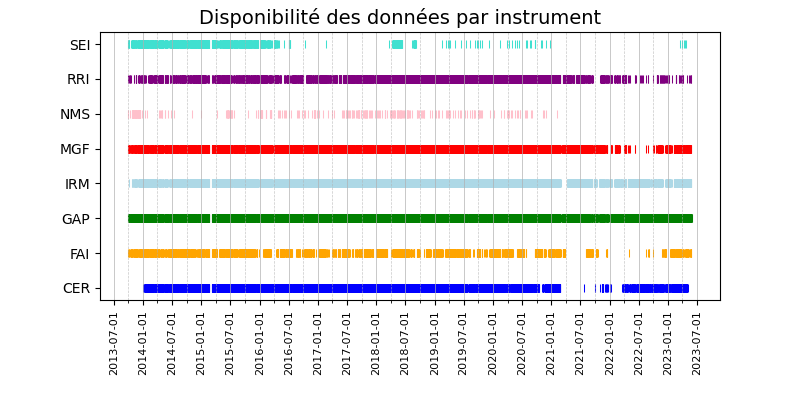

In [4]:
startDate='20130930'
endDate=dt.today().strftime('%Y%m%d')
availabilityPlot(filelist,directory,startDate,endDate)